<a href="https://colab.research.google.com/github/safreitas2000/ml-analytics-mvp/blob/main/BERT_MVP_V06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MVP DisciplinaMachine Learning & Analytics
b. Modelo baseado em Deep Learning para resolver problema de Processamento de Linguagem Natural (PLN).
**DataSet:** Amazon Cell Phones Reviews. É uma base de avaliações de telefones celulares, foi escolhida por questão didática para ilustrar um problema de classificação de texto e análise de sentimento. O dataset possui um conjunto de informações sobre as avaliações, como por exemplo, nome do avaliador, data, utilidade, review e a nota.
Para o escopo desse trabalho destacamos 2 atributos do dataset: body e rating, sendo o body a avaliação do celular e o rating uma nota atribuída pelo avaliador que pode variar de 1 até 5, sendo 1 muito ruim e 5 excelente.
Qual é a descrição do problema? é escopo desse trabalho treinar um modelo PLN para responder se determinada avaliação é positiva ou negativa.
Você tem premissas ou hipóteses sobre o problema? Quais? Foi observado por amostragem que os dados das avaliações são de fato referentes as celulares e que avaliações 1 e 2 são mais negativas enquanto 4 e 5 mais positivas. A partir dessas observações aceitamos a premissa que os dados são de fato de avaliações escopo do problema e as classificações estão adequadas para o treinamento do modelo.

Que restrições ou condições foram impostas para selecionar os dados?

In [1]:
!pip install tensorflow-text

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 35.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 524.1/524.1 MB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 93.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 76.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.8/440.8 kB 42.8 MB/s eta 0:00:00
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.7.1
    Uninstalling typing_extensions-4.7.1:
      Successfully uninstalled typing_extensions-4.7.1
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.12.0
    Uninstalling tensorflow-estimator-2.12.0:
      Successfully uninstalled tensorflow-estimator-2.12.0
  Attempting uninstall: keras
    Found existing installation: keras 2.12.0
    Uninstalling keras-2.12.0:
      Successfully uninstalled keras-2.12.0
  Attempting uninstall: tensorboard
    Fou

In [2]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense, Dropout
import tensorflow_hub as hub
import tensorflow_text as text

# Importando DataSet

In [3]:
# Informa a URL de importação do dataset
url = "https://raw.githubusercontent.com/safreitas2000/ml-analytics-mvp/main/20191226-reviews.csv"

# Lê o arquivo
df_mult = pd.read_csv(url, delimiter=',', encoding='latin-1')
df_bin = pd.read_csv(url, delimiter=',', encoding='latin-1')

df_bin.head(5)

,asin,name,rating,date,verified,title,body,helpfulVotes
0,B0000SX2UC,Janet,3,"October 11, 2005",False,"Def not best, but not worst",I had the Samsung A600 for awhile which is abs...,1.0
1,B0000SX2UC,Luke Wyatt,1,"January 7, 2004",False,Text Messaging Doesn't Work,Due to a software issue between Nokia and Spri...,17.0
2,B0000SX2UC,Brooke,5,"December 30, 2003",False,Love This Phone,"This is a great, reliable phone. I also purcha...",5.0
3,B0000SX2UC,amy m. teague,3,"March 18, 2004",False,"Love the Phone, BUT...!","I love the phone and all, because I really did...",1.0
4,B0000SX2UC,tristazbimmer,4,"August 28, 2005",False,"Great phone service and options, lousy case!",The phone has been great for every purpose it ...,1.0


# Preparação do DATASET
Limpa o DataSet e separa um sobconjunto dos dados para utilização no trabalho, a redução do número de linhas tem por propósito acelerar o processo de treinamento e manipulação dos dados.

In [4]:
df_mult = df_mult.head(10000)
df_bin = df_bin.head(10000)

In [5]:
df_mult = df_mult.dropna()
df_mult = df_mult.reset_index(drop=True)

df_bin = df_bin.dropna()
df_bin = df_bin.reset_index(drop=True)

In [6]:
df_bin.head(10)

,asin,name,rating,date,verified,title,body,helpfulVotes
0,B0000SX2UC,Janet,3,"October 11, 2005",False,"Def not best, but not worst",I had the Samsung A600 for awhile which is abs...,1.0
1,B0000SX2UC,Luke Wyatt,1,"January 7, 2004",False,Text Messaging Doesn't Work,Due to a software issue between Nokia and Spri...,17.0
2,B0000SX2UC,Brooke,5,"December 30, 2003",False,Love This Phone,"This is a great, reliable phone. I also purcha...",5.0
3,B0000SX2UC,amy m. teague,3,"March 18, 2004",False,"Love the Phone, BUT...!","I love the phone and all, because I really did...",1.0
4,B0000SX2UC,tristazbimmer,4,"August 28, 2005",False,"Great phone service and options, lousy case!",The phone has been great for every purpose it ...,1.0
5,B0000SX2UC,the cell phone store owner,5,"April 16, 2004",False,Wanna cool Nokia? You have it here!,Cool. Cheap. Color: 3 words that describe the ...,2.0
6,B0000SX2UC,Matt,4,"April 3, 2004",False,Problem with 3588i universal headset,"The 3599i is overall a nice phone, except that...",2.0
7,B0000SX2UC,Charles Cook,5,"November 24, 2003",False,cool phone!!!!!!!!,"I've never owned a Nokia phone before, so this...",7.0
8,B0000SX2UC,Amazon Customer,3,"February 2, 2004",False,Pissed off-a little bit,ok well im in school and i need the text messa...,3.0
9,B0000SX2UC,habblie,4,"December 25, 2004",False,"works great, but don't dropt it",I've had this phone for over a year and I real...,1.0


In [7]:
import re
df_bin["rating"] = df_bin["rating"].astype(int)
df_mult["rating"] = df_mult["rating"].astype(int)

In [8]:
#Para aumentar a acurácia e facilitar a tarefa de classificação, considerando a dificuldade em diferenciar classificações as classificações 1 e 2, assim como 4 e 5. Dessa forma
#resolvi converter 1 e 2 em "0" que significa uma avaliação negativa e 4 e 5 em "1" que significa uma classificação positiva, dessa forma vamos passar a abordar o problema como
#classificação binária.
mapping={1:0,2:0,3:None,4:1,5:1}
df_bin.rating=df_bin.rating.map(mapping)
df_bin=df_bin.dropna(subset='rating')

In [9]:
rat_bin=df_bin.rating.value_counts()
rat_mult=df_mult.rating.value_counts()

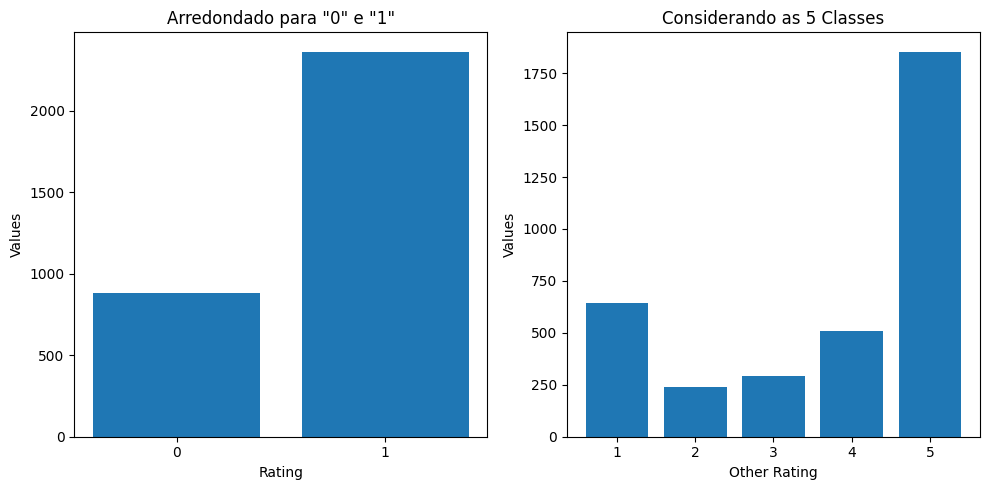

In [10]:
import matplotlib.pyplot as plt

# Criação da grade de subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Plotagem do primeiro gráfico
axes[0].bar(rat_bin.index, rat_bin.values)
axes[0].set_xticks(rat_bin.index)
axes[0].set_xlabel('Target')
axes[0].set_ylabel('Values')
axes[0].set_title('Arredondado para "0" e "1"')

# Plotagem do segundo gráfico
axes[1].bar(rat_mult.index, rat_mult.values)
axes[1].set_xlabel('Target')
axes[1].set_ylabel('Values')
axes[1].set_title('Considerando as 5 Classes')

# Ajuste de layout e exibição dos gráficos
plt.tight_layout()
plt.show()

In [11]:
df_bin.loc[:, "body"] = df_bin["body"].str.encode("ascii", "ignore").str.decode("utf-8")
df_bin.loc[:, "body"] = df_mult["body"].str.encode("ascii", "ignore").str.decode("utf-8")

In [36]:
df_bin = df_bin[["body", "rating"]]
df_mult = df_mult[["body", "rating"]]
df_mult.loc[:, "rating"] = df_mult["rating"].astype(float)

In [13]:
df_mult.head(10)

,body,rating
0,I had the Samsung A600 for awhile which is abs...,3.0
1,Due to a software issue between Nokia and Spri...,1.0
2,"This is a great, reliable phone. I also purcha...",5.0
3,"I love the phone and all, because I really did...",3.0
4,The phone has been great for every purpose it ...,4.0
5,Cool. Cheap. Color: 3 words that describe the ...,5.0
6,"The 3599i is overall a nice phone, except that...",4.0
7,"I've never owned a Nokia phone before, so this...",5.0
8,ok well im in school and i need the text messa...,3.0
9,I've had this phone for over a year and I real...,4.0


# Separação em base de treino e teste

In [14]:
X_train, X_test, y_train, y_test = train_test_split(df_bin.body,df_bin.rating,test_size=0.2)
R_train, R_test, t_train, t_test = train_test_split(df_mult.body,df_mult.rating,test_size=0.2)

# Carrega o BERT preprocessor e encoder
O modelo BERT (Bidirectional Encoder Representations from Transformers) é um modelo de linguagem pré-treinado desenvolvido pelo Google que possui uma arquitetura baseada em transformers. No escopo desse trabalho o BERT foi utilizado para classificação de texto.

In [15]:
bert_preprocess = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
bert_encoder = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4")

In [16]:
def get_sentense_embeding(sentences):
    preprocesed_text=bert_preprocess(sentences)
    return bert_encoder(preprocesed_text)['pooled_output']
get_sentense_embeding([
    df_bin.body[5],df_bin.body[1]
])

<tf.Tensor: shape=(2, 768), dtype=float32, numpy=
array([[-0.66974694, -0.55856156, -0.9775242 , ..., -0.939019  ,
        -0.6770846 ,  0.6674904 ],
       [-0.78146726, -0.6098954 , -0.9507825 , ..., -0.92656064,
        -0.7495821 ,  0.5948985 ]], dtype=float32)>

In [17]:
#1 neuronio de saída com ativação sigmoid
text_input=tf.keras.layers.Input(shape=(),dtype=tf.string,name='text')
preprocessed_text=bert_preprocess(text_input)
outputs=bert_encoder(preprocessed_text)
l=tf.keras.layers.Dropout(0.1,name='dropout')(outputs['pooled_output'])
l=tf.keras.layers.Dense(1,activation='sigmoid',name='output')(l)
model_bin=tf.keras.Model(inputs=[text_input],outputs=[l])


#Alterado para considerar as 5 classses e ativação softmax
text_input=tf.keras.layers.Input(shape=(),dtype=tf.string,name='text')
preprocessed_text=bert_preprocess(text_input)
outputs=bert_encoder(preprocessed_text)
l=tf.keras.layers.Dropout(0.1,name='dropout')(outputs['pooled_output'])
l=tf.keras.layers.Dense(5,activation='softmax',name='output')(l)
model_mult=tf.keras.Model(inputs=[text_input],outputs=[l])

In [18]:
model_bin.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 text (InputLayer)           [(None,)]                    0         []                            
                                                                                                  
 keras_layer (KerasLayer)    {'input_word_ids': (None,    0         ['text[0][0]']                
                             128),                                                                
                              'input_type_ids': (None,                                            
                             128),                                                                
                              'input_mask': (None, 128)                                           
                             }                                                                

In [19]:
METRICS_BIN=[
    tf.keras.metrics.BinaryAccuracy(name='accuracy'),
    tf.keras.metrics.Precision(name='precision'),
    tf.keras.metrics.Recall(name='recall')
]

METRICS_MULT=[
    tf.keras.metrics.CategoricalAccuracy(name='accuracy'),
    tf.keras.metrics.Precision(name='precision'),
    tf.keras.metrics.Recall(name='recall')
]

model_mult.compile(optimizer='adam',loss='categorical_crossentropy',metrics=METRICS_MULT)
model_bin.compile(optimizer='adam',loss='binary_crossentropy',metrics=METRICS_BIN)

In [20]:
history = model_bin.fit(X_train,y_train,epochs=10)

Epoch 1/10
82/82 [==============================] - 34s 305ms/step - loss: 0.5831 - accuracy: 0.7229 - precision: 0.7335 - recall: 0.9758
Epoch 2/10
82/82 [==============================] - 25s 304ms/step - loss: 0.5442 - accuracy: 0.7356 - precision: 0.7360 - recall: 0.9958
Epoch 3/10
82/82 [==============================] - 25s 310ms/step - loss: 0.5262 - accuracy: 0.7434 - precision: 0.7464 - recall: 0.9831
Epoch 4/10
82/82 [==============================] - 25s 310ms/step - loss: 0.5036 - accuracy: 0.7507 - precision: 0.7515 - recall: 0.9847
Epoch 5/10
82/82 [==============================] - 26s 313ms/step - loss: 0.4831 - accuracy: 0.7711 - precision: 0.7674 - recall: 0.9858
Epoch 6/10
82/82 [==============================] - 26s 316ms/step - loss: 0.4758 - accuracy: 0.7765 - precision: 0.7741 - recall: 0.9805
Epoch 7/10
82/82 [==============================] - 26s 320ms/step - loss: 0.4634 - accuracy: 0.7869 - precision: 0.7883 - recall: 0.9689
Epoch 8/10
82/82 [================

In [21]:
#Converta os rótulos de classe em codificação one-hot
t_train_adjusted = t_train - 1
t_train_one_hot = tf.keras.utils.to_categorical(t_train_adjusted, num_classes=5)
#print(t_train_one_hot)

history_mult = model_mult.fit(R_train,t_train_one_hot,epochs=10)

Epoch 1/10
89/89 [==============================] - 32s 329ms/step - loss: 1.3617 - accuracy: 0.5057 - precision: 0.5611 - recall: 0.3296
Epoch 2/10
89/89 [==============================] - 29s 330ms/step - loss: 1.2895 - accuracy: 0.5286 - precision: 0.6175 - recall: 0.3660
Epoch 3/10
89/89 [==============================] - 29s 330ms/step - loss: 1.2553 - accuracy: 0.5513 - precision: 0.6400 - recall: 0.3727
Epoch 4/10
89/89 [==============================] - 30s 335ms/step - loss: 1.2041 - accuracy: 0.5647 - precision: 0.6955 - recall: 0.3975
Epoch 5/10
89/89 [==============================] - 30s 336ms/step - loss: 1.2080 - accuracy: 0.5665 - precision: 0.6769 - recall: 0.3971
Epoch 6/10
89/89 [==============================] - 30s 335ms/step - loss: 1.1792 - accuracy: 0.5704 - precision: 0.7004 - recall: 0.4091
Epoch 7/10
89/89 [==============================] - 30s 335ms/step - loss: 1.1525 - accuracy: 0.5856 - precision: 0.7065 - recall: 0.4204
Epoch 8/10
89/89 [================

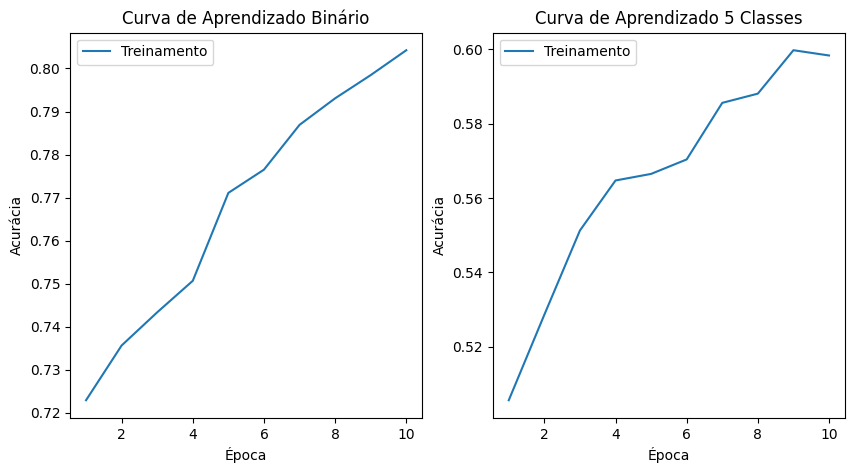

In [22]:
import matplotlib.pyplot as plt

# Criação da grade de subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Obtendo os scores de treinamento do histórico
train_scores_mult = history_mult.history['accuracy']
train_scores = history.history['accuracy']

# Plotando a curva de aprendizado
axes[0].plot(range(1, 11), train_scores, label='Treinamento')
axes[0].set_xlabel('Época')
axes[0].set_ylabel('Acurácia')
axes[0].set_title('Curva de Aprendizado Binário')
axes[0].legend()


# Plotando a curva de aprendizado
axes[1].plot(range(1, 11), train_scores_mult, label='Treinamento')
axes[1].set_xlabel('Época')
axes[1].set_ylabel('Acurácia')
axes[1].set_title('Curva de Aprendizado 5 Classes')
axes[1].legend()

plt.show()


In [23]:
model_bin.evaluate(X_test,y_test)

21/21 [==============================] - 8s 322ms/step - loss: 0.4423 - accuracy: 0.7535 - precision: 0.7476 - recall: 0.9914


[0.4423452317714691, 0.7534668445587158, 0.7475728392601013, 0.991416335105896]

In [24]:
#Converta os rótulos de classe em codificação one-hot
t_test_adjusted = t_test - 1
t_test_one_hot = tf.keras.utils.to_categorical(t_test_adjusted, num_classes=5)

model_mult.evaluate(R_test,t_test_one_hot)

23/23 [==============================] - 9s 328ms/step - loss: 1.0997 - accuracy: 0.6294 - precision: 0.7548 - recall: 0.3918


[1.0996557474136353,
 0.6294201016426086,
 0.7547683715820312,
 0.3917963206768036]

In [25]:
y_pred=model_bin.predict(X_test)
y_pred=y_pred.flatten()

21/21 [==============================] - 7s 331ms/step


In [26]:
t_pred=model_mult.predict(R_test)
#t_pred=y_pred.flatten()
print(t_pred)

23/23 [==============================] - 8s 327ms/step
[[0.23016536 0.0581998  0.12741145 0.32070458 0.26351887]
 [0.16752774 0.08604857 0.12915017 0.28019077 0.3370827 ]
 [0.15112823 0.05007721 0.03035928 0.10526345 0.6631718 ]
 ...
 [0.39948514 0.03796989 0.0825064  0.18557431 0.29446423]
 [0.18998657 0.08039432 0.09988268 0.17723857 0.45249787]
 [0.12901564 0.04012105 0.07102423 0.19327936 0.56655973]]


In [27]:
t_pred_classes = np.argmax(t_pred, axis=1)
#print(t_pred_classes)

In [28]:
y_pred=np.where(y_pred>0.5,1,0)
#y_pred

In [29]:
from sklearn.metrics import confusion_matrix, classification_report
cm=confusion_matrix(y_test,y_pred)
t_test = t_test - 1
cm_mult=confusion_matrix(t_test,t_pred_classes)

Text(50.722222222222214, 0.5, 'Truth')

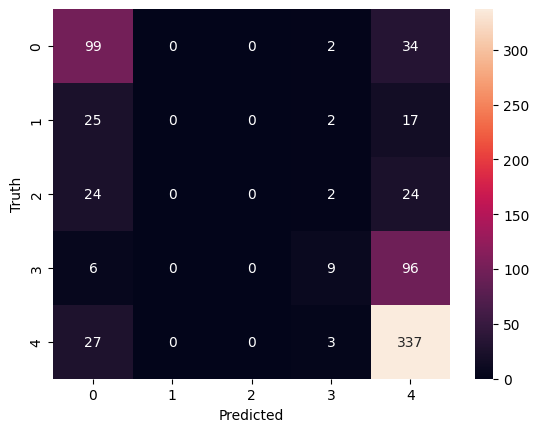

In [30]:
from matplotlib import pyplot as plt
import seaborn as sns
sns.heatmap(cm_mult,annot=True,fmt='d')

plt.xlabel("Predicted")
plt.ylabel("Truth")

In [31]:
print(classification_report(t_test,t_pred_classes,zero_division=1))

              precision    recall  f1-score   support

         0.0       0.55      0.73      0.63       135
         1.0       1.00      0.00      0.00        44
         2.0       1.00      0.00      0.00        50
         3.0       0.50      0.08      0.14       111
         4.0       0.66      0.92      0.77       367

    accuracy                           0.63       707
   macro avg       0.74      0.35      0.31       707
weighted avg       0.66      0.63      0.54       707



Text(50.722222222222214, 0.5, 'Truth')

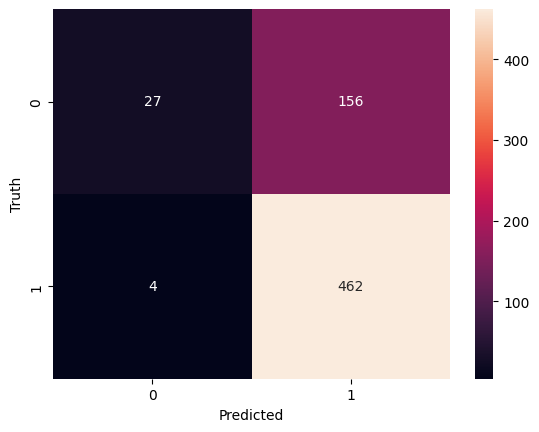

In [32]:
from matplotlib import pyplot as plt
import seaborn as sns
sns.heatmap(cm,annot=True,fmt='d')

plt.xlabel("Predicted")
plt.ylabel("Truth")

In [33]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.87      0.15      0.25       183
         1.0       0.75      0.99      0.85       466

    accuracy                           0.75       649
   macro avg       0.81      0.57      0.55       649
weighted avg       0.78      0.75      0.68       649



In [37]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

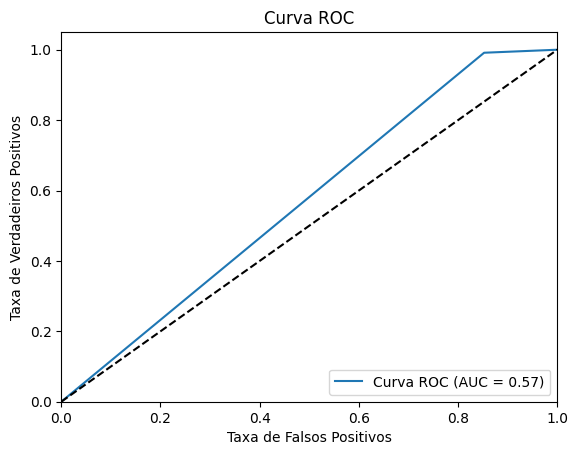

Área sob a curva (AUC): 0.5694786463097166


In [38]:
fpr, tpr, thresholds = roc_curve(y_test,y_pred)
roc_auc = auc(fpr, tpr)

# Plotar a curva ROC
plt.plot(fpr, tpr, label='Curva ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

# Imprimir o valor da AUC
print('Área sob a curva (AUC):', roc_auc)